<a href="https://colab.research.google.com/github/Stephane-Masamba/Team_4_CPT_ML-Classification/blob/Mikael/Copy_of_Mikael_Daniels_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Many companies are built around lessening their environmental impact and thus they offer products that are environmentally friendly and sustainable. With that, they would like to determine how people perceive climate change.




This notebook aims to create a Machine Learning model that is able to classify whether or not a person believes in climate change based on their novel tweet.


#Imports

###Import Libraries

In [1]:
!pip install spacy
!pip install NLTK

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from numpy import arange
import re
import spacy.cli
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from google.colab import drive

In [3]:
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nlp = spacy.load('en_core_web_sm')

#Modelling with tokenization and lemmatization

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


In [6]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


In [7]:
i = 0
for tweet in train['message']:
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+', 'LINK', tweet)
  tweet = re.sub(r'@\S+', 'USER_REF', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = tweet.lstrip()
  tweet = tweet.rstrip()
  tweet = tweet.replace('  ', ' ')
  train.loc[i, 'message'] = tweet
  i += 1

In [8]:
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt USER_REF researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736
4,1,rt USER_REF its 2016 and a racist sexist clima...,466954
...,...,...,...
15814,1,rt USER_REF they took down the material on glo...,22001
15815,2,rt USER_REF how climate change could be breaki...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt USER_REF hey liberals the climate change cr...,819732


In [9]:
my_stop_words = stopwords.words('english')
my_stop_words.append('LINK')
my_stop_words.append('USER_REF')

train_index = 0

for tweet in train['message']:
  tweet = word_tokenize(tweet)
  tweet = [word for word in tweet if not word in my_stop_words]
  tweet = ' '.join(tweet)

  train.loc[train_index, 'message'] = tweet
  train_index += 1

In [10]:
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired 2016 pivotal year war clima...,573736
4,1,rt 2016 racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking 200millionyea...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [11]:
train_index = 0

for tweet in train['message']:
  tweet = nlp(tweet)

  for entity in tweet.ents:
    train.loc[train_index, 'message'] = train.loc[train_index, 'message'].replace(str(entity.text), str(entity.label_))

  train_index += 1

In [12]:
train

,sentiment,message,tweetid
0,1,ORG chief doesnt think carbon dioxide main cau...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say DATE act climate change late,698562
3,1,todayinmaker wired DATE pivotal year war clima...,573736
4,1,rt DATE racist sexist climate change denying b...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking CARDINAL rela...,17856
15816,0,PERSON rt nytimesworld trump actually believe ...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [13]:
train_index = 0

for tweet in train['message']:
  tweet = nlp(tweet)
  
  for token in tweet:
    train.loc[train_index, 'message'] = train.loc[train_index, 'message'].replace(str(token.text), str(token.lemma_))

  train_index += 1

In [14]:
train

,sentiment,message,tweetid
0,1,ORG chief donot think carbon dioxide main caus...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researcher say DATE act climate change late,698562
3,1,todayinmaker wire DATE pivotal year war climat...,573736
4,1,rt DATE racist sexist climate change deny bigo...,466954
...,...,...,...
15814,1,rt take material global warming lgbt right hea...,22001
15815,2,rt climate change could break CARDINAL relatio...,17856
15816,0,person rt nytimesworld trump actually believe ...,384248
15817,-1,rt hey liberal climate change crap hoax ties a...,819732


In [15]:
j = 0
for message in test['message']:
  message = message.lower()
  message = re.sub(r'http\S+', 'LINK', message)
  message = re.sub(r'@\S+', 'USER_REF', message)
  message = re.sub(r'[^\w\s]', '', message)
  message = message.lstrip()
  message = message.rstrip()
  message = message.replace('  ', ' ')
  test.loc[j, 'message'] = message
  j += 1

In [16]:
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,USER_REF USER_REF USER_REF USER_REF \nputin go...,476263
4,rt USER_REF female orgasms cause global warmin...,872928
...,...,...
10541,rt USER_REF brb writing a poem about climate c...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt USER_REF pacific countries positive about f...,78329
10544,rt USER_REF youre so hot you must be the cause...,867455


In [17]:
test_index = 0

for message in test['message']:
  message = word_tokenize(message)
  message = [word for word in message if not word in my_stop_words]
  message = ' '.join(message)

  test.loc[test_index, 'message'] = message
  test_index += 1

In [18]:
test

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


In [19]:
test_index = 0

for message in test['message']:
  message = nlp(message)

  for entity in message.ents:
    test.loc[test_index, 'message'] = test.loc[test_index, 'message'].replace(str(entity.text), str(entity.label_))

  test_index += 1

In [20]:
test

,message,tweetid
0,LOC looking GPE make sure alone fighting clima...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,PERSON got PERSON doesnt believe climate chang...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,DATE climate change came home hottest DATE rec...,875167
10543,rt pacific countries positive GPE leading glob...,78329
10544,rt youre hot must cause global warming aldubla...,867455


In [21]:
test_index = 0

for message in test['message']:
  message = nlp(message)
  
  for token in message:
    test.loc[test_index, 'message'] = test.loc[test_index, 'message'].replace(str(token.text), str(token.lemma_))

  test_index += 1

In [22]:
test

,message,tweetid
0,LOC look GPE make sure alone fight climate change,169760
1,combine polling staffer climate change women r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,person get person donot believe climate change...,476263
4,rt female orgasm cause global warm sarcastic NORP,872928
...,...,...
10541,rt brb write poem climate change climatechange...,895714
10542,date climate change come home hot date record ...,875167
10543,rt pacific country positive GPE lead global cl...,78329
10544,rt -PRON-be hot must cause global warming aldu...,867455


In [23]:
X_train = train['message']
X_train

0        ORG chief donot think carbon dioxide main caus...
1          like lack evidence anthropogenic global warming
2           rt researcher say DATE act climate change late
3        todayinmaker wire DATE pivotal year war climat...
4        rt DATE racist sexist climate change deny bigo...
                               ...                        
15814    rt take material global warming lgbt right hea...
15815    rt climate change could break CARDINAL relatio...
15816    person rt nytimesworld trump actually believe ...
15817    rt hey liberal climate change crap hoax ties a...
15818       rt climate change equation CARDINAL screenshot
Name: message, Length: 15819, dtype: object

In [24]:
y_train = train['sentiment']
y_train

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [26]:
tf_vect = TfidfVectorizer(ngram_range=(1, 2))


In [27]:
X_train = tf_vect.fit_transform(X_train)

In [28]:
X_test = test['message']

In [29]:
X_test = tf_vect.transform(X_test)

#Modelling

In [30]:
def accuracy(model):
    features = train['message']
    target = train['sentiment']

    train_scores = []
    test_scores = []

    tf_vect = TfidfVectorizer(ngram_range=(1, 2))

    folds = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in folds.split(features):
        x_train, x_test = features.iloc[train_index], features.iloc[test_index]    
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        x_train = tf_vect.fit_transform(x_train)
        x_test = tf_vect.transform(x_test)
     
        model.fit(x_train, y_train)
        train_predictions = model.predict(x_train)
        test_predictions = model.predict(x_test)

        train_score = accuracy_score(y_train, train_predictions)
        train_scores.append(train_score)

        test_score = accuracy_score(y_test, test_predictions)
        test_scores.append(test_score)

    avg_train_accuracy = np.mean(train_scores)
    avg_test_accuracy = np.mean(test_scores)

    return [avg_train_accuracy, avg_test_accuracy]


In [31]:
sv = SVC()

In [32]:
sv_accuracy = accuracy(sv)
sv_accuracy

[0.9674441988870246, 0.7069972896956074]

In [33]:
bernoulli = BernoulliNB()

In [34]:
bernoulli_accuracy = accuracy(bernoulli)
bernoulli_accuracy

[0.732568485795104, 0.6201408670815726]

In [35]:
mnb = MultinomialNB()

In [36]:
mnb_accuracy = accuracy(mnb)
mnb_accuracy

[0.6998862262184062, 0.6270938310498322]

In [37]:
sgd = SGDClassifier()

In [38]:
sgd_accuracy = accuracy(sgd)
sgd_accuracy

[0.9378279248819068, 0.7183768510187922]

In [39]:
rand_forest = RandomForestClassifier()

In [40]:
rand_forest_accuracy = accuracy(rand_forest)
rand_forest_accuracy

[0.9969972829955331, 0.6753911275801551]

In [41]:
knn = KNeighborsClassifier()

In [42]:
knn_accuracy = accuracy(knn)
knn_accuracy

[0.7285227090525025, 0.6116694172066157]

In [43]:
grad_booster = GradientBoostingClassifier()

In [44]:
grad_booster_accuracy = accuracy(grad_booster)
grad_booster_accuracy

[0.693106327306257, 0.6422022692054503]

In [45]:
extra_trees = ExtraTreesClassifier()

In [46]:
extra_trees_accuracy = accuracy(extra_trees)
extra_trees_accuracy

[0.9970288898068503, 0.6996014481602825]

In [47]:
bagging = BaggingClassifier()

In [48]:
bagging_accuracy = accuracy(bagging)
bagging_accuracy

[0.9744768861065893, 0.6111647674018449]

In [49]:
dec_tree = DecisionTreeClassifier()

In [50]:
dec_tree_accuracy = accuracy(dec_tree)
dec_tree_accuracy

[0.9970921071756991, 0.5660290863104647]

In [51]:
linear_sv = LinearSVC()

In [52]:
linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy

[0.9930779459855815, 0.7224223630289061]

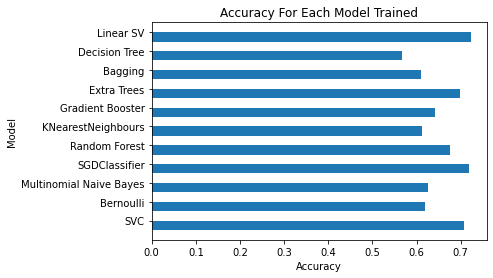

In [53]:
models = ['SVC', 'Bernoulli', 'Multinomial Naive Bayes', 'SGDClassifier', 'Random Forest', 'KNearestNeighbours', 'Gradient Booster', 'Extra Trees', 'Bagging', 'Decision Tree', 'Linear SV']
bar_widths = [sv_accuracy[1], bernoulli_accuracy[1], mnb_accuracy[1], sgd_accuracy[1], rand_forest_accuracy[1], knn_accuracy[1], grad_booster_accuracy[1], extra_trees_accuracy[1], bagging_accuracy[1], dec_tree_accuracy[1], linear_sv_accuracy[1]]
bar_positions = arange(11) + 0.75
tick_positions = range(1,12)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(models)

ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy For Each Model Trained')

plt.show()

#Modelling with resampled data


In [54]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


In [55]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())

                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


In [56]:
from sklearn.utils import resample

In [57]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [58]:
train_majority = train[train.sentiment== 1]
train_01 = train[train.sentiment<= 0]
train_2 = train[train.sentiment== 2]
#train_minority = train[train.sentiment== -1]
train_minority = pd.concat([train_01, train_2])

In [59]:
# Downsample majority class
train_majority_downsampled = resample(train_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1296,     # to match minority class
                                 random_state=123) # reproducible results



# Combine minority class with downsampled majority class
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

In [60]:
train_downsampled

,sentiment,message,tweetid
11177,1,RT @MorrisseyHelena: My view on clean/green/ne...,967739
13782,1,RT @betterthemask: Before the Flood's free to ...,350132
12981,1,"RT @kelkulus: Irony: Florida, a state in dange...",619610
10340,1,someone who doesnt believe in climate change: ...,258258
868,1,RT @IzhaarEMuzamat: KP is fighting climate cha...,454755
...,...,...,...
15802,2,Michael Bloomberg to world leaders: ignore Tru...,585908
15803,2,"Suicides of nearly 60,000 Indian farmers linke...",296403
15805,2,RT @GrindTV: New head of EPA says climate chan...,830383
15809,2,The quest to capture and store carbon — and sl...,705048


In [61]:
train_downsampled['sentiment'].value_counts()

 2    3640
 0    2353
-1    1296
 1    1296
Name: sentiment, dtype: int64

In [62]:

i = 0
for tweet in train['message']:
  tweet = tweet.lower()
  tweet = re.sub(r'http\S+', 'LINK', tweet)
  tweet = re.sub(r'@\S+', 'USER_REF', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = tweet.lstrip()
  tweet = tweet.rstrip()
  tweet = tweet.replace('  ', ' ')
  train.loc[i, 'message'] = tweet
  i += 1

In [63]:
my_stop_words = stopwords.words('english')
my_stop_words.append('LINK')
my_stop_words.append('USER_REF')

train_index = 0

for tweet in train['message']:
  tweet = word_tokenize(tweet)
  tweet = [word for word in tweet if not word in my_stop_words]
  tweet = ' '.join(tweet)

  train.loc[train_index, 'message'] = tweet
  train_index += 1

In [64]:
train_index = 0

for tweet in train['message']:
  tweet = nlp(tweet)

  for entity in tweet.ents:
    train.loc[train_index, 'message'] = train.loc[train_index, 'message'].replace(str(entity.text), str(entity.label_))

  train_index += 1

In [65]:
train_index = 0

for tweet in train['message']:
  tweet = nlp(tweet)
  
  for token in tweet:
    train.loc[train_index, 'message'] = train.loc[train_index, 'message'].replace(str(token.text), str(token.lemma_))

  train_index += 1

In [66]:

j = 0
for message in test['message']:
  message = message.lower()
  message = re.sub(r'http\S+', 'LINK', message)
  message = re.sub(r'@\S+', 'USER_REF', message)
  message = re.sub(r'[^\w\s]', '', message)
  message = message.lstrip()
  message = message.rstrip()
  message = message.replace('  ', ' ')
  test.loc[j, 'message'] = message
  j += 1

In [67]:

test_index = 0

for message in test['message']:
  message = word_tokenize(message)
  message = [word for word in message if not word in my_stop_words]
  message = ' '.join(message)

  test.loc[test_index, 'message'] = message
  test_index += 1

In [68]:

test_index = 0

for message in test['message']:
  message = nlp(message)

  for entity in message.ents:
    test.loc[test_index, 'message'] = test.loc[test_index, 'message'].replace(str(entity.text), str(entity.label_))

  test_index += 1

In [69]:
test_index = 0

for message in test['message']:
  message = nlp(message)
  
  for token in message:
    test.loc[test_index, 'message'] = test.loc[test_index, 'message'].replace(str(token.text), str(token.lemma_))

  test_index += 1

In [70]:
X_train = train['message']
X_train

0        ORG chief donot think carbon dioxide main caus...
1          like lack evidence anthropogenic global warming
2           rt researcher say DATE act climate change late
3        todayinmaker wire DATE pivotal year war climat...
4        rt DATE racist sexist climate change deny bigo...
                               ...                        
15814    rt take material global warming lgbt right hea...
15815    rt climate change could break CARDINAL relatio...
15816    person rt nytimesworld trump actually believe ...
15817    rt hey liberal climate change crap hoax ties a...
15818       rt climate change equation CARDINAL screenshot
Name: message, Length: 15819, dtype: object

In [71]:

y_train = train['sentiment']
y_train

0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

In [72]:
X_train = tf_vect.fit_transform(X_train)

In [73]:
X_test = test['message']
X_test = tf_vect.transform(X_test)

In [74]:
sv = SVC()

sv_accuracy = accuracy(sv)
sv_accuracy

[0.9674758119420327, 0.7092097190452342]

In [75]:
bernoulli = BernoulliNB()

bernoulli_accuracy = accuracy(bernoulli)
bernoulli_accuracy

[0.7330425792236944, 0.6193179633507372]

In [76]:
mnb = MultinomialNB()

mnb_accuracy = accuracy(mnb)
mnb_accuracy

[0.7005026058667716, 0.6269680882741465]

In [77]:
sgd = SGDClassifier()


sgd_accuracy = accuracy(sgd)
sgd_accuracy

[0.9379069675093318, 0.7176818483948211]

In [78]:
rand_forest = RandomForestClassifier()


rand_forest_accuracy = accuracy(rand_forest)
rand_forest_accuracy

[0.9970763043944096, 0.6772234508278199]

In [79]:

knn = KNeighborsClassifier()

knn_accuracy = accuracy(knn)
knn_accuracy

[0.7276376771272629, 0.6134397683710955]

In [80]:
grad_booster = GradientBoostingClassifier()


grad_booster_accuracy = accuracy(grad_booster)
grad_booster_accuracy

[0.6921265336377591, 0.6429608826455385]

In [81]:
extra_trees = ExtraTreesClassifier()

extra_trees_accuracy = accuracy(extra_trees)
extra_trees_accuracy


[0.9970921059269606, 0.6961243766319882]

In [82]:
bagging = BaggingClassifier()
bagging_accuracy = accuracy(bagging)
bagging_accuracy

[0.9750142555947215, 0.6102786125767556]

In [83]:
dec_tree = DecisionTreeClassifier()
dec_tree_accuracy = accuracy(dec_tree)
dec_tree_accuracy

[0.997028888558112, 0.5695683897210677]

In [84]:
linear_sv = LinearSVC()
linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy

[0.9928566808240273, 0.7229273325864443]

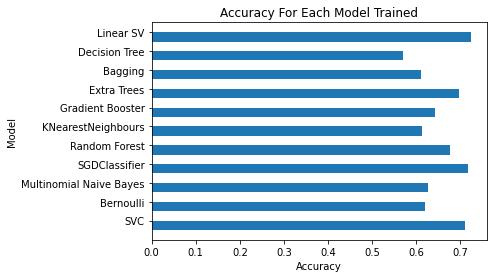

In [85]:
models = ['SVC', 'Bernoulli', 'Multinomial Naive Bayes', 'SGDClassifier', 'Random Forest', 'KNearestNeighbours', 'Gradient Booster', 'Extra Trees', 'Bagging', 'Decision Tree', 'Linear SV']
bar_widths = [sv_accuracy[1], bernoulli_accuracy[1], mnb_accuracy[1], sgd_accuracy[1], rand_forest_accuracy[1], knn_accuracy[1], grad_booster_accuracy[1], extra_trees_accuracy[1], bagging_accuracy[1], dec_tree_accuracy[1], linear_sv_accuracy[1]]
bar_positions = arange(11) + 0.75
tick_positions = range(1,12)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(models)

ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy For Each Model Trained')

plt.show()

In [86]:
train = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/train%20(1).csv')
print(train.head())

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954


In [87]:
test = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/test%20(1).csv')
print(test.head())


                                             message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928


In [88]:
sample = pd.read_csv('https://raw.githubusercontent.com/Stephane-Masamba/Team_4_CPT_ML-Classification/Mikael/sample_submission.csv')
print(sample.head())


   tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          1


#Exploratory Data Analysis

###Data Cleaning

Below we clean the tweets made by individuals in order to allow for readability by our machines.Examples of how we clean the data is by removing punctuations,converting all leters to lower case,removing numbers and so on.

In [89]:
i = 0
for tweet in train['message']:
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', 'LINK', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lstrip()
    tweet = tweet.rstrip()
    tweet = tweet.replace('  ', ' ')
    train.loc[i, 'message'] = tweet
    i += 1

  

In [90]:
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in ...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
...,...,...,...
15814,1,rt ezlusztig they took down the material on gl...,22001
15815,2,rt washingtonpost how climate change could be ...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt sara8smiles hey liberals the climate change...,819732


In [91]:
j = 0
for message in test['message']:
    message = message.lower()
    message = re.sub(r'http\S+', 'LINK', message)
    message = re.sub(r'[^\w\s]', '', message)
    message = message.lstrip()
    message = message.rstrip()
    message = message.replace('  ', ' ')
    test.loc[j, 'message'] = message
    j += 1

In [92]:
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,karoli morgfair osborneink dailykos \nputin go...,476263
4,rt fakewillmoore female orgasms cause global w...,872928
...,...,...
10541,rt brittanybohrer brb writing a poem about cli...,895714
10542,2016 the year climate change came home during ...,875167
10543,rt loop_vanuatu pacific countries positive abo...,78329
10544,rt xanria_00018 youre so hot you must be the c...,867455


In [93]:
train.isnull().sum()


sentiment    0
message      0
tweetid      0
dtype: int64

In [94]:
test.isnull().sum()


message    0
tweetid    0
dtype: int64

In [95]:
X_train = train['message']
X_train


0        polyscimajor epa chief doesnt think carbon dio...
1        its not like we lack evidence of anthropogenic...
2        rt rawstory researchers say we have three year...
3        todayinmaker wired 2016 was a pivotal year in ...
4        rt soynoviodetodas its 2016 and a racist sexis...
                               ...                        
15814    rt ezlusztig they took down the material on gl...
15815    rt washingtonpost how climate change could be ...
15816    notiven rt nytimesworld what does trump actual...
15817    rt sara8smiles hey liberals the climate change...
15818    rt chet_cannon kurteichenwalds climate change ...
Name: message, Length: 15819, dtype: object

In [96]:
y_train = train['sentiment']
y_train


0        1
1        1
2        2
3        1
4        1
        ..
15814    1
15815    2
15816    0
15817   -1
15818    0
Name: sentiment, Length: 15819, dtype: int64

###Convert to machine language

In [97]:
X_train = tf_vect.fit_transform(X_train)


In [98]:
X_test = test['message']


In [99]:
X_test = tf_vect.transform(X_test)


##Support Vector Machine

In [100]:
sv = SVC()


In [101]:
sv_accuracy = accuracy(sv)
sv_accuracy


[0.9805455299919432, 0.7294393175196938]

###Naive_Bayes

####Bernoulli

In [102]:
bernoulli = BernoulliNB()


In [103]:
bernoulli_accuracy = accuracy(bernoulli)
bernoulli_accuracy


[0.7552152375025036, 0.634679066146056]

####Multinomial

In [104]:
mnb = MultinomialNB()


In [105]:
mnb_accuracy = accuracy(mnb)
mnb_accuracy


[0.7008818513891713, 0.6316456915512925]

###Stochastic Gradient Descent

In [106]:
sgd = SGDClassifier()


In [107]:
sgd_accuracy = accuracy(sgd)
sgd_accuracy


[0.9594001161825976, 0.7500479828996219]

###Random Forest

In [108]:
rand_forest = RandomForestClassifier()


In [109]:
rand_forest_accuracy = accuracy(rand_forest)
rand_forest_accuracy


[0.9992256175135024, 0.703584968102663]

###KNeighbors

In [110]:
knn = KNeighborsClassifier()


In [111]:
knn_accuracy = accuracy(knn)
knn_accuracy


[0.7695966713136375, 0.6636317998923231]

##Hyperarameter Tuning

In [112]:
grad_booster = GradientBoostingClassifier()


In [113]:
grad_booster_accuracy = accuracy(grad_booster)
grad_booster_accuracy


[0.7299924151644763, 0.6803843468230364]

In [114]:
extra_trees = ExtraTreesClassifier()


In [115]:
extra_trees_accuracy = accuracy(extra_trees)
extra_trees_accuracy


[0.999209814732213, 0.7248257447341716]

In [116]:

bagging = BaggingClassifier()

In [117]:
bagging_accuracy = accuracy(bagging)
bagging_accuracy


[0.9802452584163703, 0.6350583328970041]

In [118]:
dec_tree = DecisionTreeClassifier()


In [119]:
dec_tree_accuracy = accuracy(dec_tree)
dec_tree_accuracy


[0.9992098097372605, 0.5863190581042738]

In [120]:
linear_sv = LinearSVC()


In [121]:
linear_sv_accuracy = accuracy(linear_sv)
linear_sv_accuracy


[0.9977716667307686, 0.7619946257553659]

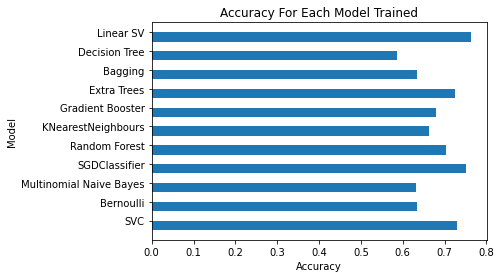

In [122]:
cols = ['SVC', 'Bernoulli', 'Multinomial Naive Bayes', 'SGDClassifier', 
        'Random Forest', 'KNearestNeighbours', 'Gradient Booster', 
        'Extra Trees', 'Bagging', 'Decision Tree', 'Linear SV']
bar_widths = [sv_accuracy[1], bernoulli_accuracy[1], mnb_accuracy[1], 
              sgd_accuracy[1], rand_forest_accuracy[1], knn_accuracy[1], 
              grad_booster_accuracy[1], extra_trees_accuracy[1], 
              bagging_accuracy[1], dec_tree_accuracy[1], linear_sv_accuracy[1]]
bar_positions = arange(11) + 0.75
tick_positions = range(1, 12)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(cols)

ax.set_ylabel('Model')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy For Each Model Trained')

plt.show()


In [123]:
linear_svc = LinearSVC()


In [124]:
linear_svc.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [125]:
predictions = linear_svc.predict(X_test)


In [126]:
test['sentiment'] = predictions
test


,message,tweetid,sentiment
0,europe will now be looking to china to make su...,169760,1
1,combine this with the polling of staffers re c...,35326,1
2,the scary unimpeachable evidence that climate ...,224985,1
3,karoli morgfair osborneink dailykos \nputin go...,476263,1
4,rt fakewillmoore female orgasms cause global w...,872928,0
...,...,...,...
10541,rt brittanybohrer brb writing a poem about cli...,895714,1
10542,2016 the year climate change came home during ...,875167,1
10543,rt loop_vanuatu pacific countries positive abo...,78329,2
10544,rt xanria_00018 youre so hot you must be the c...,867455,0


In [127]:
submission = test[['tweetid', 'sentiment']]
submission


,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


#Model Analysis

#Conclusion